# 1. zadatak 

Crna rupa mase $M$ i spina $\chi \in [0, 1]$, ima nesvodivu (engl. *irreducible*) masu:

$$
M_{\text{irr}} = M \sqrt{\frac{1 + \sqrt{1 - \chi^2}}{2}}.
$$

Koristimo $f = M_{\text{irr}} / M$. Imamo ponovljena mjerenja od $M$ i $\chi$, pretpostavljamo da je spin uniformno raspoređen u gorenavedenom intervalu, a da masa prati normalnu raspodjelu $\mathcal{N}(\mu, \sigma)$.

---

### Parametri:

- Koristiti vrijednosti: $\sigma = 0.02$ i $\mu = 1$ (sve mase u problemu izražene su u jedinicama $\mu$)
- Plotovati dobijenu **PDF** funkciju za $M_{\text{irr}}$. Koristiti **Scottovo** ili **Friedman–Diaconis** pravilo.
- Plotovati raspodjelu $M_{\text{irr}}$ pomoću **Kernel Density Estimation (KDE)** metode.
- Izračunati **Kolmogorov–Smirnov distancu** $D$ između $M_{\text{irr}}$ i $f$ kao funkciju od $\sigma$. Komentarisati granice za velike i male vrijednosti $\sigma$.
- Izračunati Kolmogorov–Smirnov distancu $D$ između $M_{\text{irr}}$ i $M$ kao funkciju od $\sigma$. Komentarisati granice za velike i male vrijednosti $\sigma$.

---

### PDF funkcija za $f$

Može se koristiti formula:

$$
\pi(f) = 2 \cdot \frac{2f^2 - 1}{\sqrt{1 - f^2}}.
$$

Provjeriti da li je $\pi(f)$ normalizovana.

---

### PDF funkcija za $M_{\text{irr}}$

Korisna je sljedeća formula:

$$
p(M_{\text{irr}}) = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^{1} \exp\left( -\frac{(M_{\text{irr}} / f - \mu)^2}{2 \sigma^2} \right) \cdot \frac{2f^2 - 1}{f \sqrt{1 - f^2}} \, df
$$

---

> **Napomena:** Važi formula $\chi = \frac{cJ}{GM^2}$, gdje je $J$ ugaoni moment.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ks_2samp
from scipy.integrate import quad
import pandas as pd


In [6]:
# Parametri
mu = 1.0
sigma = 0.02
N = 10000

In [8]:
# 1. Generisanje uzoraka M i chi
np.random.seed(0)
M_samples = np.random.normal(mu, sigma, N)
chi_samples = np.random.uniform(0, 1, N)

In [10]:
# 2. Izračunavanje M_irr i f
M_irr_samples = M_samples * np.sqrt((1 + np.sqrt(1 - chi_samples**2)) / 2)
f_samples = M_irr_samples / M_samples

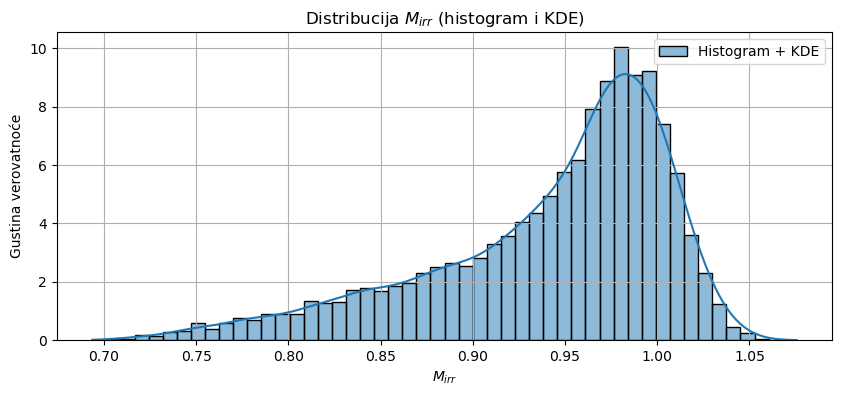

In [12]:
# 3. Histogram i KDE za M_irr
plt.figure(figsize=(10, 4))
sns.histplot(M_irr_samples, kde=True, bins=50, stat='density', label='Histogram + KDE')
plt.title("Distribucija $M_{irr}$ (histogram i KDE)")
plt.xlabel("$M_{irr}$")
plt.ylabel("Gustina verovatnoće")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# 4. PDF funkcija za f
def pi_f(f):
    return 2 * (2 * f**2 - 1) / np.sqrt(1 - f**2)

# Normalizacija PDF funkcije pi(f)
f_vals = np.linspace(1/np.sqrt(2)+1e-5, 1-1e-5, 1000)
pi_vals = pi_f(f_vals)
area_pi, _ = quad(pi_f, 1/np.sqrt(2), 1)


In [16]:
# 5. Kolmogorov–Smirnov testovi
D_Mirr_vs_f = ks_2samp(M_irr_samples, f_samples).statistic
D_Mirr_vs_M = ks_2samp(M_irr_samples, M_samples).statistic

In [18]:
# 6. Izračunavanje teorijskog PDF-a za M_irr
def p_Mirr(Mirr_val, mu, sigma):
    integrand = lambda f: (
        np.exp(-((Mirr_val / f - mu)**2) / (2 * sigma**2))
        * (2 * f**2 - 1) / (f * np.sqrt(1 - f**2))
    )
    const = np.sqrt(2 / np.pi) / sigma
    result, _ = quad(integrand, 1/np.sqrt(2), 1)
    return const * result

Mirr_range = np.linspace(min(M_irr_samples), max(M_irr_samples), 300)
pdf_theory = np.array([p_Mirr(x, mu, sigma) for x in Mirr_range])


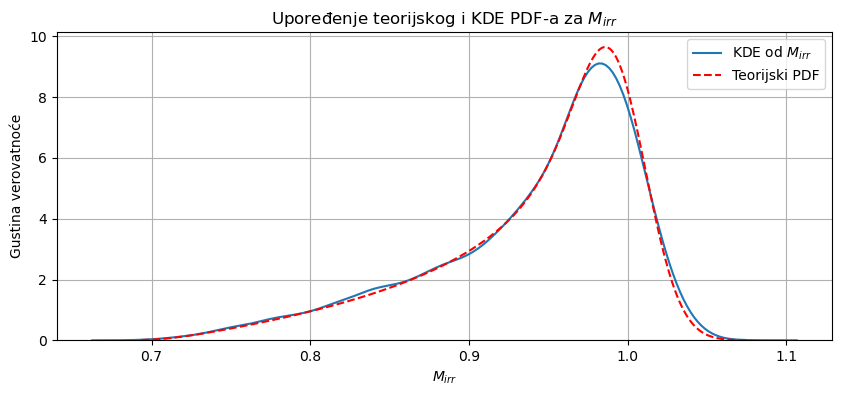

In [20]:
# 7. Prikaz upoređenja PDF-a
plt.figure(figsize=(10, 4))
sns.kdeplot(M_irr_samples, label="KDE od $M_{irr}$")
plt.plot(Mirr_range, pdf_theory, 'r--', label="Teorijski PDF")
plt.title("Upoređenje teorijskog i KDE PDF-a za $M_{irr}$")
plt.xlabel("$M_{irr}$")
plt.ylabel("Gustina verovatnoće")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# 8. Rezime rezultata
import pandas as pd
from IPython.display import display

df_summary = pd.DataFrame({
    'Mjera': [
        r'KS distanca: $M_{\mathrm{irr}}$ vs $f$', 
        r'KS distanca: $M_{\mathrm{irr}}$ vs $M$', 
        r'Integracija $\pi(f)$'
    ],
    'Vrijednost': [D_Mirr_vs_f, D_Mirr_vs_M, area_pi]
})

display(df_summary)


,Mjera,Vrijednost
0,KS distanca: $M_{\mathrm{irr}}$ vs $f$,0.1551
1,KS distanca: $M_{\mathrm{irr}}$ vs $M$,0.5045
2,Integracija $\pi(f)$,1.0000
